In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests # from urllib.request import urlopen

from bs4 import BeautifulSoup 
import time
from datetime import datetime
import re
import pandas as pd
import numpy as np

In [2]:
merged_df=pd.read_excel('final_merged_netflix_1229.xlsx', index=False, encoding='utf-8')
merged_df

,Region,Country,Movies,Movie Point,TV shows,TV show Point,Genre
0,,World,Enola Holmes,16432,Emily in Paris,27143,Drama
1,,World,The Christmas Chronicles: Part Two,15416,Lucifer,25969,Comedy
2,,World,Holidate,14724,The Umbrella Academy,23443,Comedy
3,,World,The Social Dilemma,13583,Dark Desire,21013,Documentary
4,,World,Project Power,13003,The Crown,20171,Action
5,,World,The Kissing Booth 2,12760,Friends,17805,Romance
6,,World,The SpongeBob Movie: Sponge on the Run,12753,Yo soy Betty la fea,16140,Animated
7,,World,Extraction,12036,Ratched,15771,Action
8,,World,The Old Guard,13910,Money Heist,22535,Superhero
9,,World,365 Days,42084,The Queen's Gambit,43265,Romance


In [3]:
region_list = list(merged_df['Region'].unique())
region_list = region_list[1:]
region_list 

['Africa', 'Asia', 'Australia', 'Europe', 'Latin America', 'North America']

In [4]:
len(region_list)

6

In [5]:
#Region 별 Genre : Top 10 
region_genre = []

for region in region_list:
    df2 = merged_df[merged_df['Region']==region]
    region_genre.append(df2["Genre"].value_counts()[:10])

In [6]:
#1) Africa
df_africa = merged_df[merged_df['Region']=='Africa']
df_africa = df_africa["Genre"].value_counts()[:10].to_frame()
df_africa

,Genre
Comedy,8
Romance,7
Drama,5
Action,5
Crime,4
Superhero,4
Animated,2
Documentary,2
Thriller,2
Horror,1


In [7]:
#2) Asia
df_asia = merged_df[merged_df['Region']=='Asia']
df_asia = df_asia["Genre"].value_counts()[:10].to_frame()
df_asia

,Genre
Comedy,25
Action,25
Drama,24
Animated,19
Romance,19
Horror,14
Superhero,13
Crime,12
Documentary,9
War,6


In [8]:
#3) Australia
df_australia = merged_df[merged_df['Region']=='Australia']
df_australia= df_australia["Genre"].value_counts()[:10].to_frame()
df_australia

,Genre
Comedy,5
Animated,5
Action,4
Romance,3
Documentary,2
Drama,1


In [9]:
#4) Europe
df_europe = merged_df[merged_df['Region']=='Europe']
df_europe= df_europe["Genre"].value_counts()[:10].to_frame()
df_europe

,Genre
Comedy,83
Romance,52
Action,34
Drama,26
Documentary,26
Animated,25
Superhero,23
Fantasy,15
Science Fiction,7
Crime,5


In [10]:
#5) Latin America
df_latin= merged_df[merged_df['Region']=='Latin America']
df_latin= df_latin["Genre"].value_counts()[:10].to_frame()
df_latin

,Genre
Animated,55
Drama,34
Comedy,32
Romance,31
Fantasy,6
Documentary,4
Action,3
Science Fiction,2
Horror,2
Superhero,1


In [11]:
#6) North America
df_north= merged_df[merged_df['Region']=='North America']
df_north= df_north["Genre"].value_counts()[:10].to_frame()
df_north

,Genre
Animated,5
Comedy,5
Action,3
Superhero,2
Romance,2
Crime,1
Documentary,1
Fantasy,1


In [12]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
africa_dict = df_africa.to_dict()['Genre']
asia_dict = df_asia.to_dict()['Genre']
australia_dict = df_australia.to_dict()['Genre']
europe_dict = df_europe.to_dict()['Genre']
latin_dict = df_latin.to_dict()['Genre']
north_dict = df_north.to_dict()['Genre']

## Example 

In [15]:
afr_mask = np.array(Image.open("afr.png"))
#image_colors = ImageColorGenerator(asia_coloring)

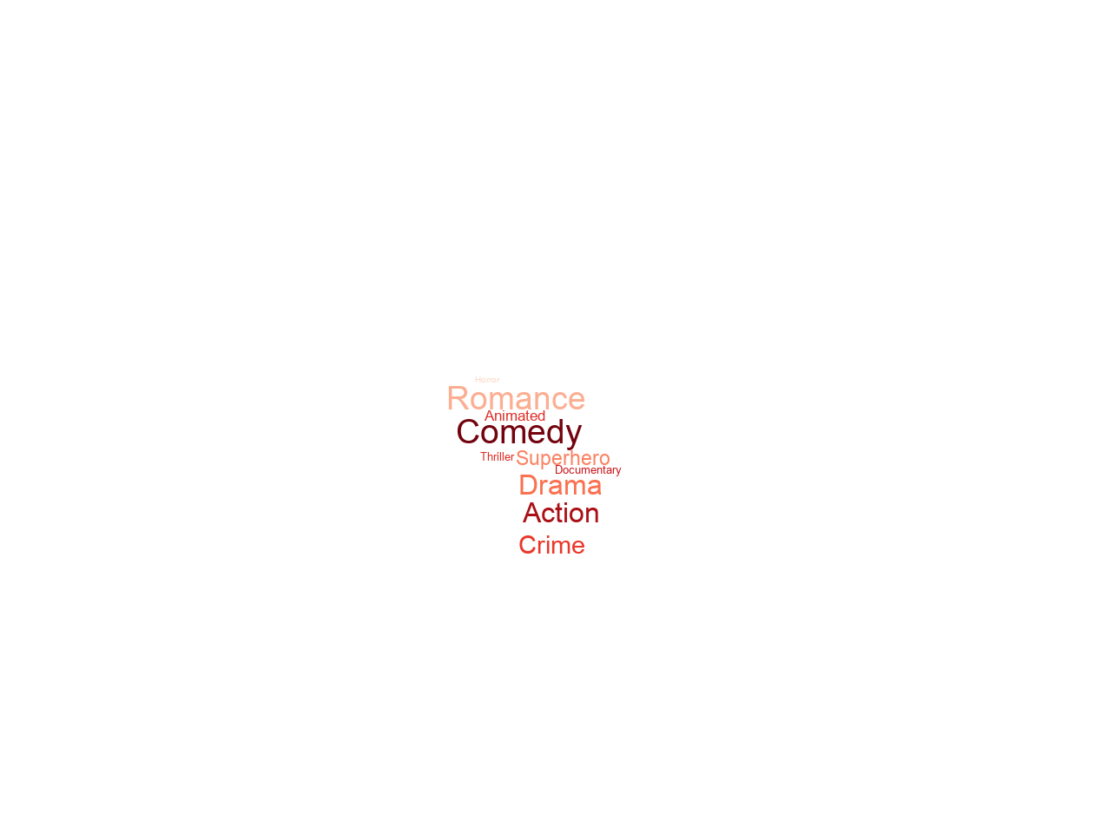

In [24]:
#1) Africa
word_cloud = WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=2000,
                       mask=afr_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(africa_dict)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_africa.png") # Save "to file"

In [21]:
asia_mask = np.array(Image.open("asia.png"))
#image_colors = ImageColorGenerator(asia_coloring)

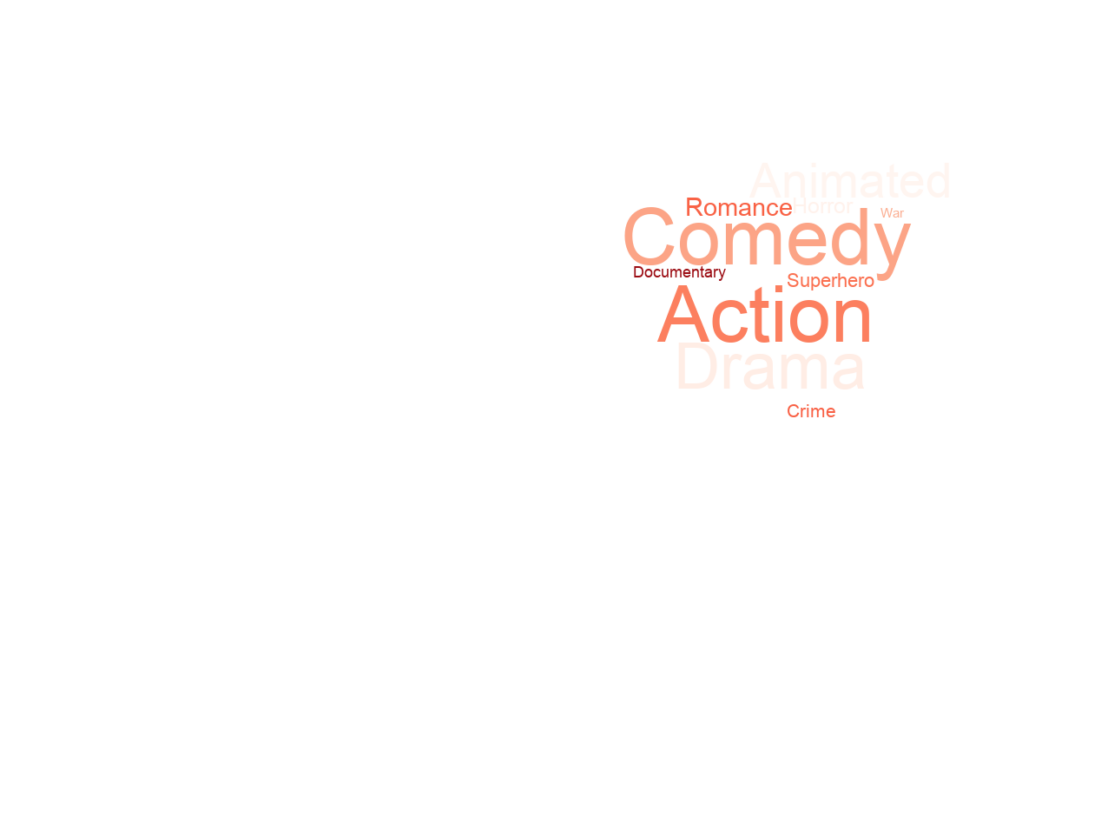

In [42]:
#2) Asia
word_cloud = WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=2000,
                       mask=asia_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(asia_dict)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_asia.png") # Save "to file"

In [32]:
austr_mask = np.array(Image.open("austr.png"))
#image_colors = ImageColorGenerator(asia_coloring)

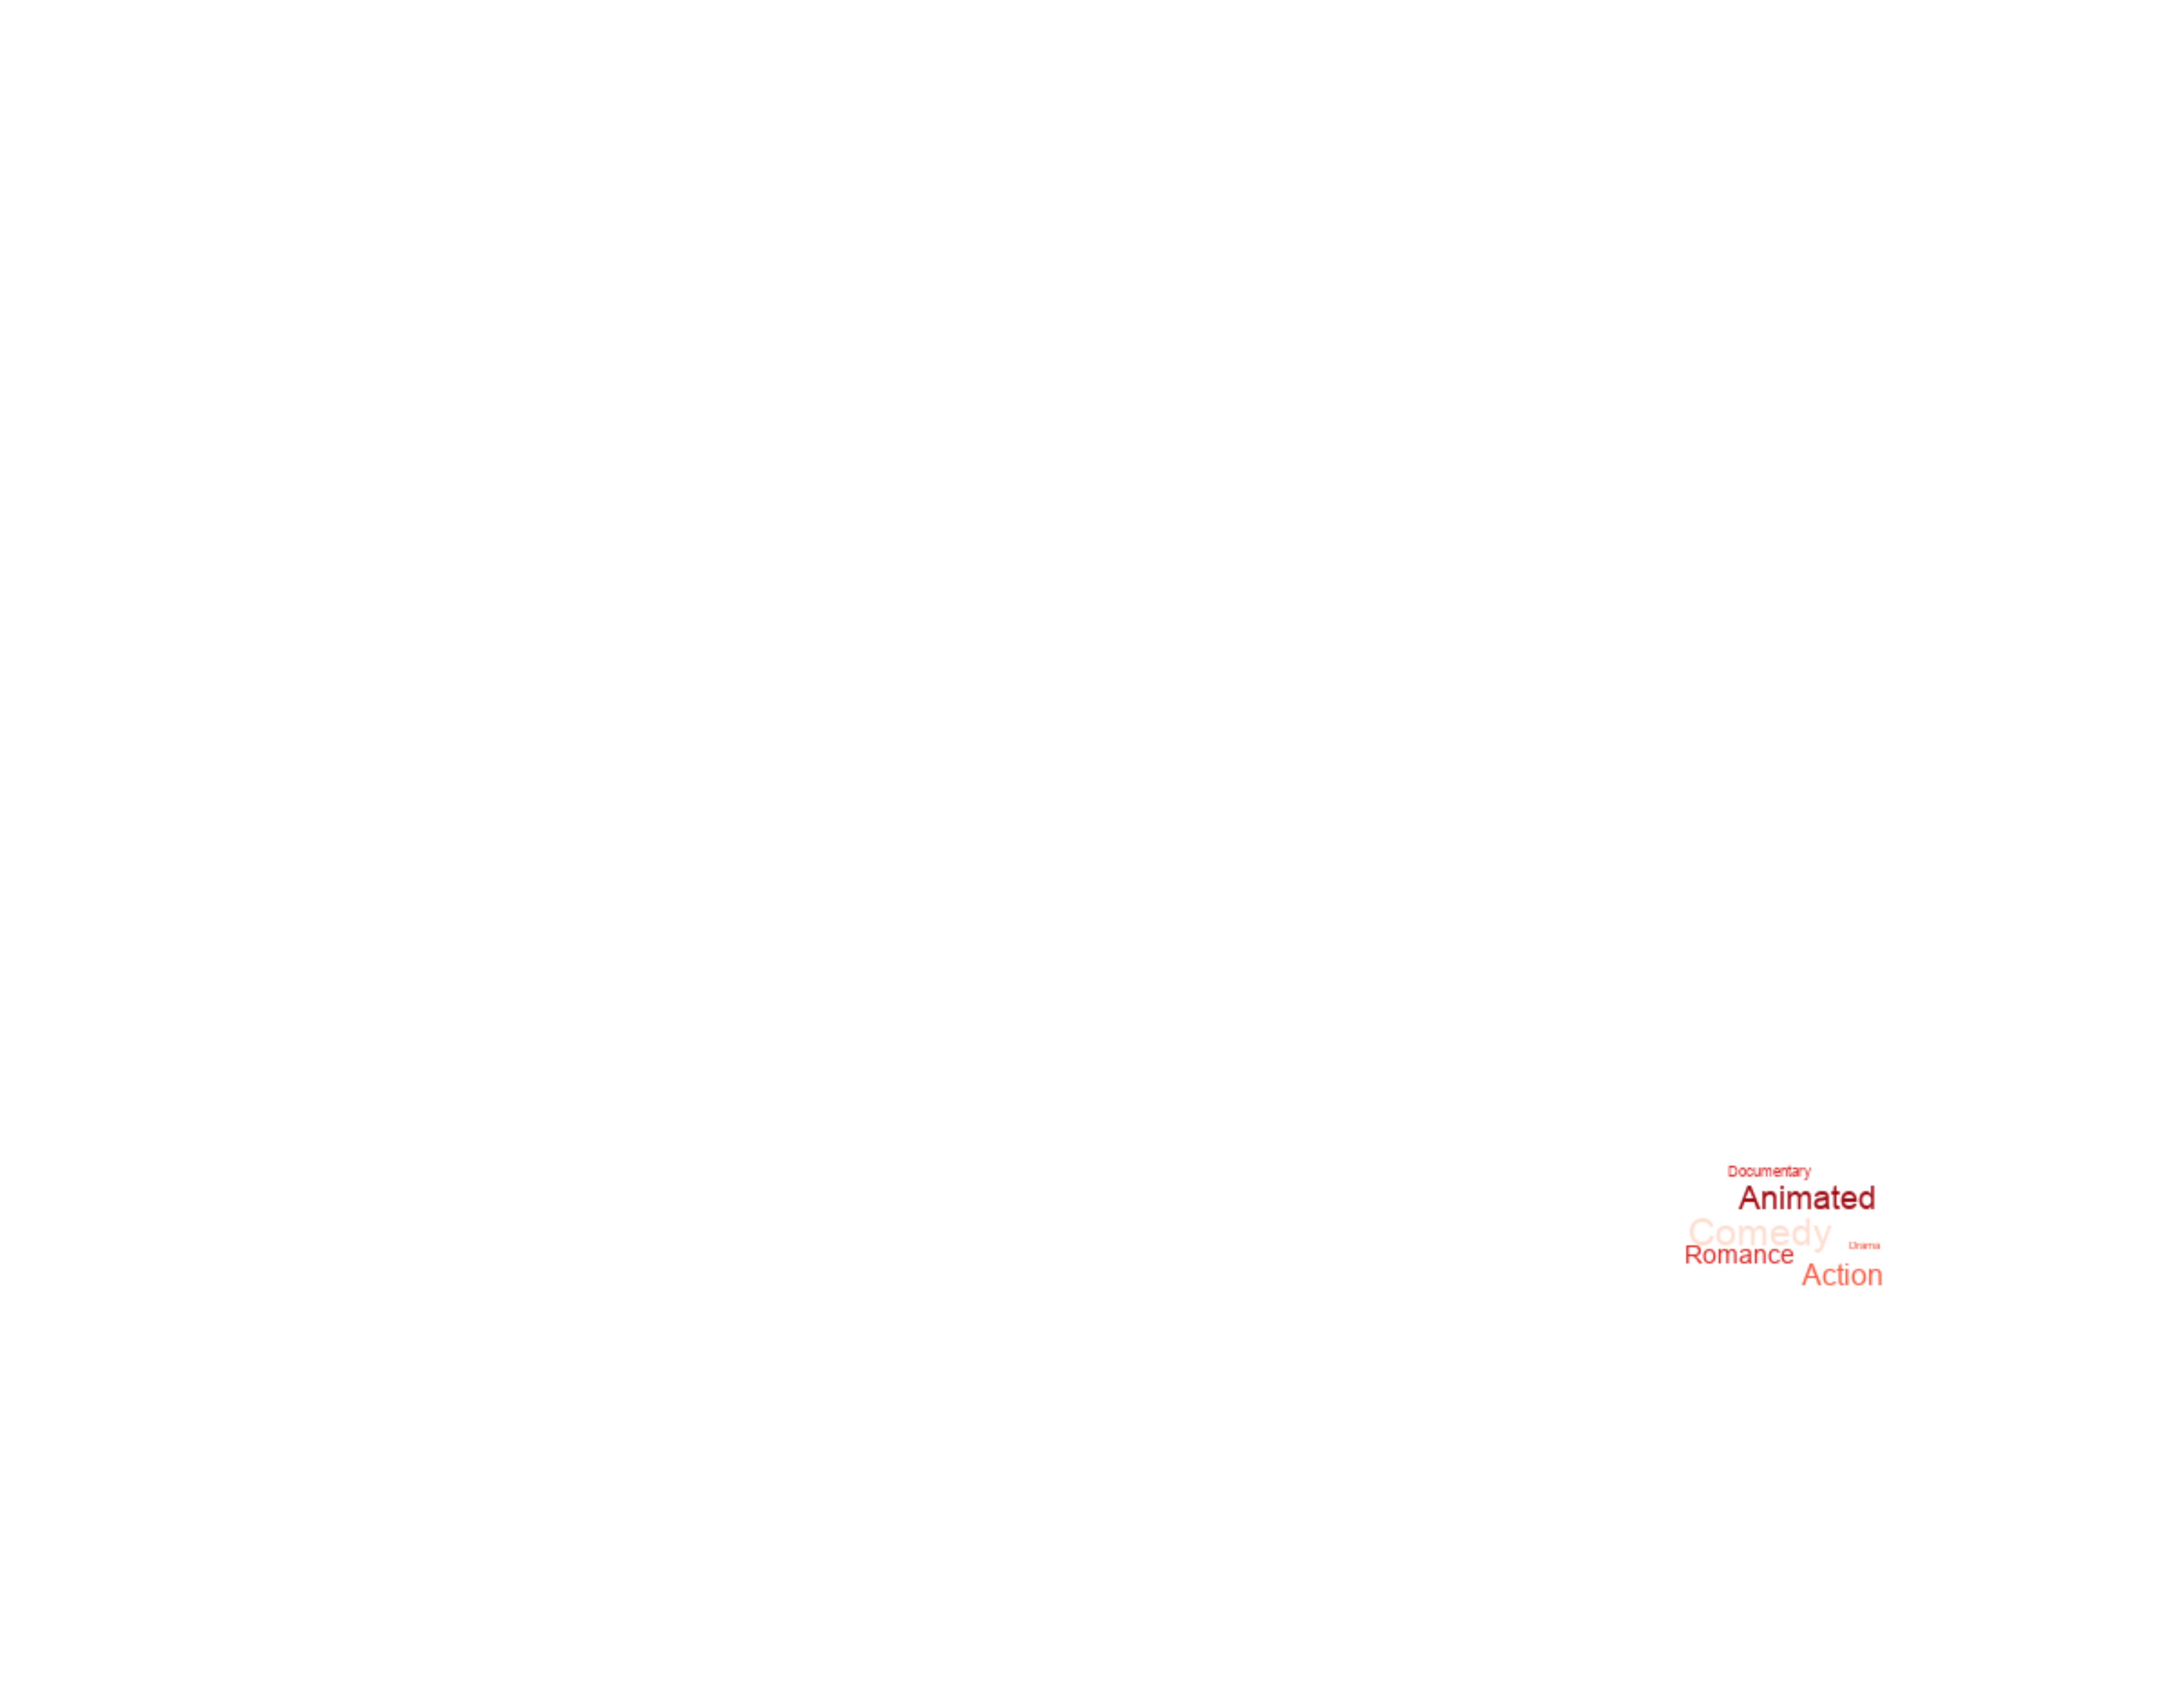

In [41]:
#Australia
word_cloud = WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=5000, height=5000,
                       mask=austr_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(australia_dict)

plt.figure(figsize=(100,100)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_australia.png") # Save "to file"

In [25]:
eu_mask = np.array(Image.open("eu.png"))
#image_colors = ImageColorGenerator(asia_coloring)

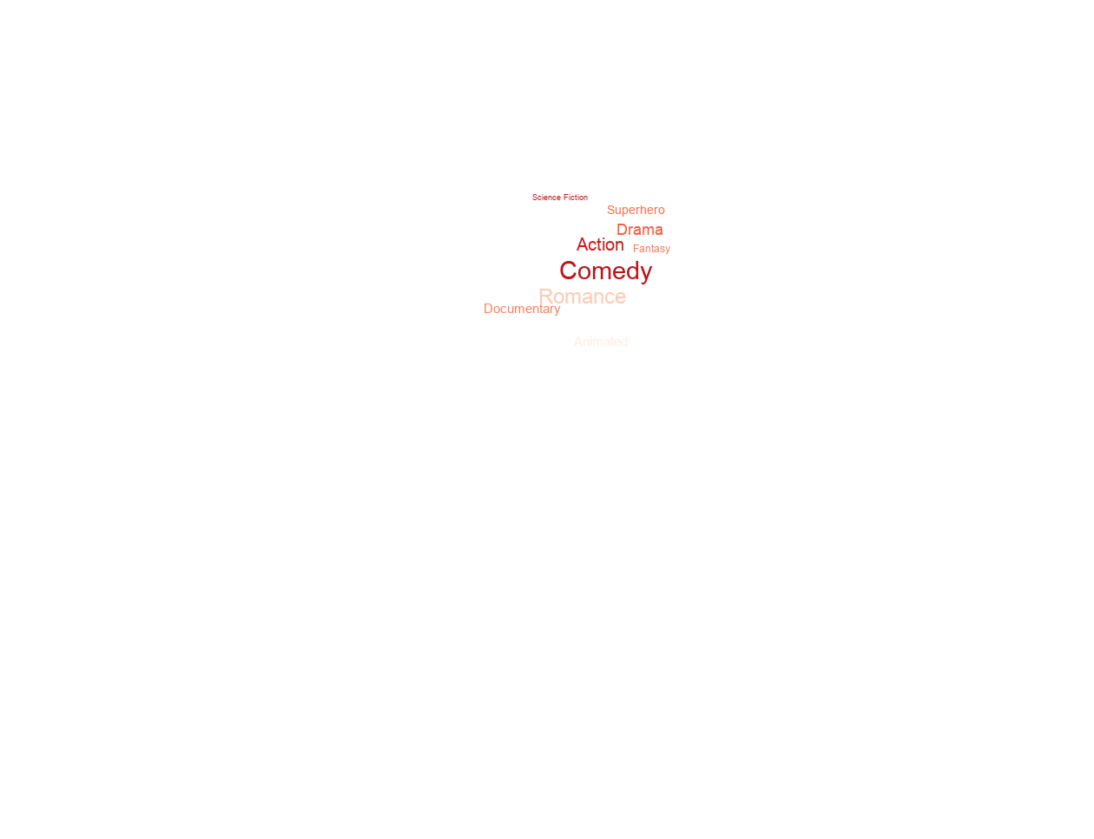

In [26]:
#europe
word_cloud =WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=2000,
                       mask=eu_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(europe_dict)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_europe.png") # Save "to file"

In [27]:
latin_mask = np.array(Image.open("latin.png"))
#image_colors = ImageColorGenerator(asia_coloring)

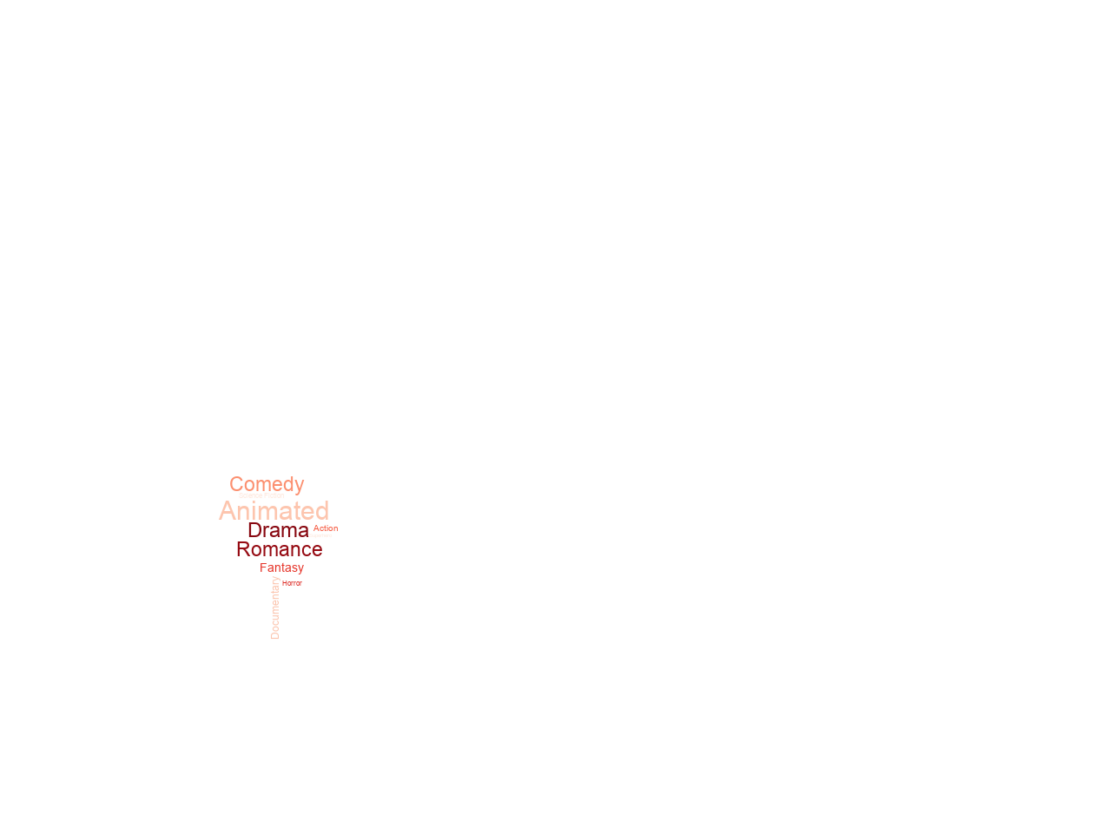

In [28]:
#latin
word_cloud = WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=2000,
                       mask=latin_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(latin_dict)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_latin.png") # Save "to file"

In [30]:
north_mask = np.array(Image.open("north.png"))
#image_colors = ImageColorGenerator(asia_coloring)

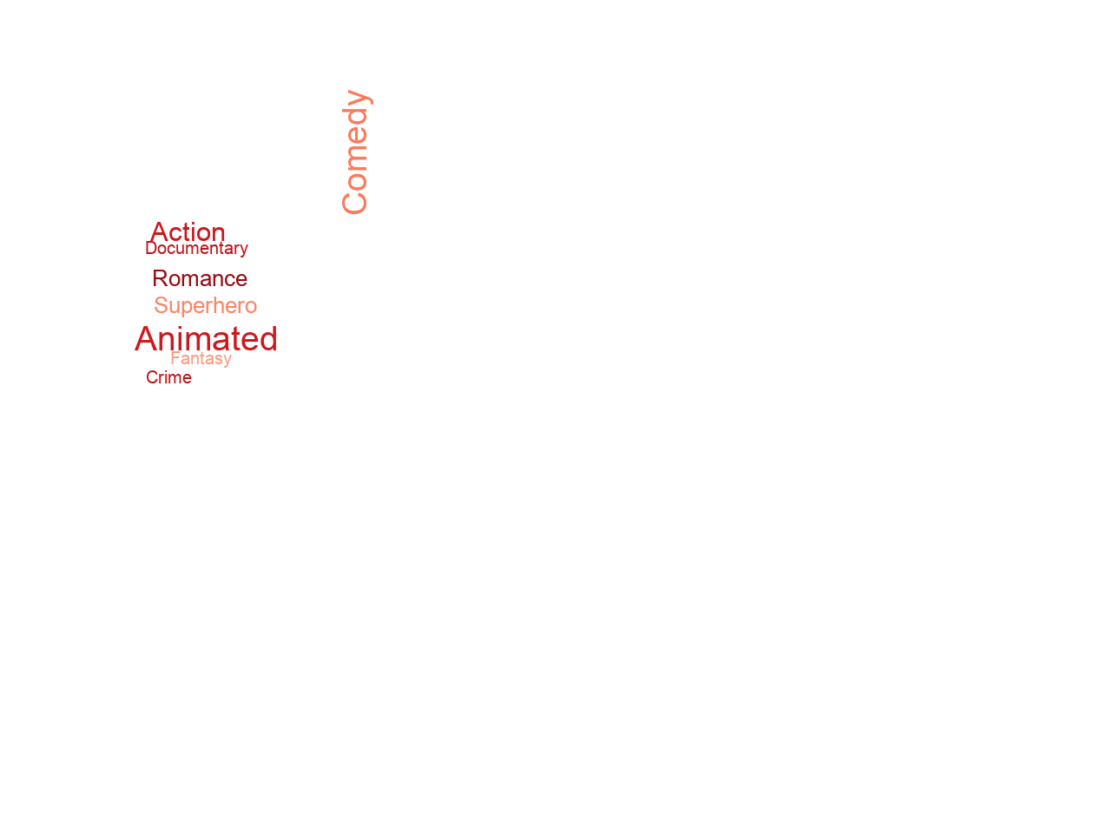

In [31]:
#north
word_cloud = WordCloud(font_path="C:/Windows/Fonts/arial.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=2000,
                       mask=north_mask, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white').generate_from_frequencies(north_dict)

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
#Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file("word_cloud_north.png") # Save "to file"